### Import packages and modules

In [1]:
#Import packages

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston

### Load the Boston Housing Dataset

In [2]:
features, prices = load_boston(return_X_y = True)

### Define Hyperparameters & Data Info

In [3]:
learning_rate = 0.001
epochs = 20000

### Data Preparation

In [4]:
#Training samples
#Scale is used to convert data into zero mean and unit std dev
train_features = tf.cast(scale(features[ : 350]), dtype = tf.float32)
train_prices = prices[ : 350]

#Validation samples
#Scale is used to convert data into zero mean and unit std dev
valid_features = tf.cast(scale(features[350 : 450]), dtype = tf.float32)
valid_prices = prices[350 : 450]

#Testing samples
#Scale is used to convert data into zero mean and unit std dev
test_features = tf.cast(scale(features[450 : ]), dtype = tf.float32)
test_prices = prices[450 : ]

### Forward pass of the model

In [5]:
#Function to make a forward passs
def forward_pass(x, weights, bias):
    return tf.add(tf.matmul(x, weights), bias)

### Define the cost function

In [6]:
#Cost function definition - R-MSE
def loss(x, y, weights, bias):
    
    #Calculate Loss and R-MSE
    squared_error = tf.square(forward_pass(x, weights, bias) - y )
    return tf.sqrt(tf.reduce_mean(squared_error))

### Put it all together

In [7]:
# Find the derivative of loss with respect to weight and bias
def gradient(x, y, weights, bias):
    
    with tf.GradientTape() as tape:
        loss_value = loss(x, y, weights, bias)
    return tape.gradient(loss_value, [weights, bias])# direction and value ofthe gradient of our weight and bias

### Initialize the Weights and Bias

In [8]:
#Initialize W and B for the network
W = tf.Variable(tf.random.normal([13, 1], mean = 1.0, stddev = 1.0, dtype = tf.float32))
B = tf.Variable(tf.zeros(1) , dtype = tf.float32)
#print(W,B)
print("Initial loss: {}".format(loss(train_features, train_prices, W, B)))

Initial loss: 27.133180618286133


### Training Loop

In [9]:
tl = []
vl = []
for i in range(epochs+1): #iterate for each training epoch
    
    #Calculate gradients
    deltaW, deltaB = gradient(train_features, train_prices, W, B) 
    
    #Wieght update and bias update
    change_W = deltaW * learning_rate 
    change_B = deltaB * learning_rate 
    
    #Make changes to the values according to the gradients and learning rate
    W.assign_sub(change_W) # subract from W
    B.assign_sub(change_B) # subract from B
    
    #Printing loss information
    if i % 1000 == 0:
        tl.append(loss(train_features, train_prices, W, B))
        vl.append(loss(valid_features, valid_prices, W, B))
        print("Training Loss after Epoch {}: {}".format(i, loss(train_features, train_prices, W, B)))
        print("Validation Loss after Epoch {}: {} \n".format(i, loss(valid_features, valid_prices, W, B)))

Training Loss after Epoch 0: 27.132160186767578
Validation Loss after Epoch 0: 19.919189453125 

Training Loss after Epoch 1000: 26.13031768798828
Validation Loss after Epoch 1000: 18.899124145507812 

Training Loss after Epoch 2000: 25.16339874267578
Validation Loss after Epoch 2000: 17.9438419342041 

Training Loss after Epoch 3000: 24.22602653503418
Validation Loss after Epoch 3000: 17.046533584594727 

Training Loss after Epoch 4000: 23.31407356262207
Validation Loss after Epoch 4000: 16.202014923095703 

Training Loss after Epoch 5000: 22.42449188232422
Validation Loss after Epoch 5000: 15.40666389465332 

Training Loss after Epoch 6000: 21.555198669433594
Validation Loss after Epoch 6000: 14.658317565917969 

Training Loss after Epoch 7000: 20.704965591430664
Validation Loss after Epoch 7000: 13.956180572509766 

Training Loss after Epoch 8000: 19.87325668334961
Validation Loss after Epoch 8000: 13.30063533782959 

Training Loss after Epoch 9000: 19.0601863861084
Validation Loss 

### Plot Loss Graphs

[]

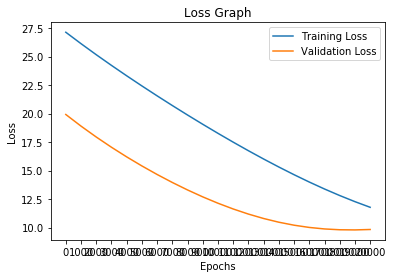

In [10]:
iterations = np.arange(0, 20001, 1000)
plt.plot(iterations, tl, label = 'Training Loss')
plt.plot(iterations, vl, label = 'Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 20001, 1000))
plt.ylabel('Loss')
plt.legend()
plt.plot()

### Real time predictions

In [11]:
def predictions(index):
    '''
    Function which takes index as input, and outputs the prediction
    '''

    example_house = index
    y = test_prices[example_house]
    y_pred = forward_pass(test_features,W.numpy(),B.numpy())[example_house]
    print('Actual median house value is {} (in $10k)'.format(y))
    print('Predicted median house value is {} (in $10k)'.format(y_pred))

In [12]:
predictions(10)

Actual median house value is 16.4 (in $10k)
Predicted median house value is [18.263775] (in $10k)


In [13]:
predictions(15)

Actual median house value is 19.9 (in $10k)
Predicted median house value is [17.12222] (in $10k)


In [14]:
predictions(20)

Actual median house value is 19.9 (in $10k)
Predicted median house value is [17.478407] (in $10k)
